# AGENDA OF THE PROJECT 

1. Data importing to pandas 
2. Top 5 rows of the data
3. Checked the duplicate values
4. Removed/Dropped the unique values 
5. Checked missing values 
6. Checked the Datatypes 
7. Descriptive analysis
8. Created Year and Month column 
9. Mapped the months in MMM format 
10. Target variable distribution (Fraud and non Fraud)  
11. analysis on fraudulent transaction only 
12. fraud.head()
13. update datatypes for date
14. Descriptive analysis on fraudulent transaction
15. inferences to make 
16. perform Pearson's correlation for the numerical columns
17. Inference 
18. Starting data visualisation part
19.  Pairplot using sns
20.  Visualising using plotly.express as px
21.  Disclaimer about Fake dataset 
22.  Deleting unwanted columns 
23.  Encoding and Scaling 
24.  reducing the size of the data 
25.  model building 
26.  testing model performance before data balancing ;RAW data
27.  Inferences
28.  Data balancing techniques
29.  undersampling 
30.  oversampling(SMOTE)
31.  Model performance post data balancing 
32.  Inference
33.  Hyperparameter tuning post data balancing 
34.  Inference 
35.  Hyperparameter tuning using Grid search CV
36.  Evualating performance post Hyperparameter tuning
37.  Selecting the best model for model building 
38.  creating  a .pkl file 
39.  Project Conclusion 
40.  Model deployment using streamlit platform 

 # Importing libraries 

In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as px

# Data Collection 
- Import the data to jupyter notebook 
- Pandas for data manipulation 

In [6]:
# read CSV file 
df = pd.read_csv("C:/Users/ritik/Desktop/skills/UPI_Fraud_Detection/upi_transactions.csv")


In [7]:
# Top 5 rows of data 
df.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20/04/23,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08/08/23,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25/06/23,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28/01/24,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21/06/23,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [8]:
df.columns

Index(['Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID',
       'Device_ID', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud'],
      dtype='object')

In [9]:
# Tells datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                647 non-null    object 
 1   Date                          647 non-null    object 
 2   Time                          647 non-null    object 
 3   Merchant_ID                   647 non-null    object 
 4   Customer_ID                   647 non-null    object 
 5   Device_ID                     647 non-null    object 
 6   Transaction_Type              647 non-null    object 
 7   Payment_Gateway               647 non-null    object 
 8   Transaction_City              647 non-null    object 
 9   Transaction_State             647 non-null    object 
 10  IP_Address                    647 non-null    object 
 11  Transaction_Status            647 non-null    object 
 12  Device_OS                     647 non-null    object 
 13  Trans

In [11]:
# Descriptive feature 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Frequency,647.0,3.564142,6.454543,0.00,1.000,2.00,3.00,50.00
Transaction_Amount_Deviation,647.0,5.014668,56.375914,-99.47,-42.355,8.38,52.29,99.45
Days_Since_Last_Transaction,647.0,15.717156,8.218122,1.00,8.500,16.00,23.00,29.00
amount,647.0,128.839753,364.995747,0.12,17.155,35.00,74.77,4883.62
fraud,647.0,0.239567,0.427150,0.00,0.000,0.00,0.00,1.00


Data Preparation 
- Duplicate values 
- Missing values 
- Unique values 
- Removing/ Dropping the unique values 

# Duplicate values in the dataset 


In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
642    False
643    False
644    False
645    False
646    False
Length: 647, dtype: bool

In [13]:
df.duplicated().sum()

0

There are no duplicate values in the dataset 

# Missing values 

In [16]:
df.isnull().sum()

Transaction_ID                  0
Date                            0
Time                            0
Merchant_ID                     0
Customer_ID                     0
Device_ID                       0
Transaction_Type                0
Payment_Gateway                 0
Transaction_City                0
Transaction_State               0
IP_Address                      0
Transaction_Status              0
Device_OS                       0
Transaction_Frequency           0
Merchant_Category               0
Transaction_Channel             0
Transaction_Amount_Deviation    0
Days_Since_Last_Transaction     0
amount                          0
fraud                           0
dtype: int64

How to deal with missing values 
- Drop the missing values (only if the missing values is very less in proportion )
- Amputation (fill back the missing values )
- Forward fill
- Backward fill
- Linear Regression 
- Mean value to replace the missing value (not recommended, as mean is    sensitive to outliers)
- Median value should be used to replace the missing value as it is robust and is not sensitive to outliers,data distribution does not matter 

In [17]:
# check the shape of the dataset 

df.shape

(647, 20)

In [18]:
# unique value in the dataset 
df.nunique()

Transaction_ID                  647
Date                            302
Time                            641
Merchant_ID                     647
Customer_ID                     647
Device_ID                       647
Transaction_Type                  7
Payment_Gateway                   9
Transaction_City                281
Transaction_State                28
IP_Address                      647
Transaction_Status                3
Device_OS                         4
Transaction_Frequency            14
Merchant_Category                10
Transaction_Channel               3
Transaction_Amount_Deviation    635
Days_Since_Last_Transaction      29
amount                          633
fraud                             2
dtype: int64

# Drop the unique values from the data

In [19]:
df.columns

Index(['Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID',
       'Device_ID', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud'],
      dtype='object')

In [20]:
df.drop(['Transaction_ID','Merchant_ID','Customer_ID','Device_ID','IP_Address' ], axis=1, inplace=True)

In [21]:
df.head(2)

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,20/04/23,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,08/08/23,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1


# Data Cleaning and feature Engineering 

In [22]:
df['Date']

0      20/04/23
1      08/08/23
2      25/06/23
3      28/01/24
4      21/06/23
         ...   
642    24/07/23
643    05/07/23
644    16/04/23
645    28/10/23
646    11/04/24
Name: Date, Length: 647, dtype: object

In [24]:
# only for single column at a time 
df.Date

0      20/04/23
1      08/08/23
2      25/06/23
3      28/01/24
4      21/06/23
         ...   
642    24/07/23
643    05/07/23
644    16/04/23
645    28/10/23
646    11/04/24
Name: Date, Length: 647, dtype: object

In [27]:
#works for more than one column , by using multi square brackets
df[['Date','amount']]

,Date,amount
0,20/04/23,396.62
1,08/08/23,121.94
2,25/06/23,106.69
3,28/01/24,3611.11
4,21/06/23,374.89
...,...,...
642,24/07/23,28.27
643,05/07/23,26.26
644,16/04/23,6.02
645,28/10/23,17.12


In [28]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,20/04/23,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,08/08/23,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,25/06/23,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,28/01/24,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,21/06/23,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [29]:
# importing date and time module in python 

import datetime as dt  

In [30]:
#Converting Date column to datetime
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%y')

# Creating a new column 'year' column with the help of Datetime Module available in python , apply it to 'Date' column 

In [32]:
#Extracting the year from the datetime module from the date column 
df['Year'] = df['Date'].dt.year

In [33]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023


# Create a month column with the month of transactions

In [34]:
# Extracting the month from 'Date' column using datetime module available in python 
df['Month'] = df['Date'].dt.month

In [35]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,4
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,8
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,6
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,1
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,6


In [37]:
# df['Month].unique()
#Sort the series or array or list 
df['Month'].sort_values(ascending=True)

513     1
559     1
426     1
171     1
255     1
       ..
60     12
520    12
296    12
227    12
150    12
Name: Month, Length: 647, dtype: int32

In [40]:
df['Month'].sort_values(ascending=True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

# Months column to have format 'MMM' as compared to numbers 1-12

### Creating a dictionary with key:Value pairs for the number of months and their respective names 

In [41]:
#Defining the values in my dictionary :
months = {
    1:'Jan',2:'feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'
}

In [42]:
# Map the dictionary to the month column 
# It has not modified my original dataset 

df['Month']= df['Month'].map(months)

In [43]:
df.head()

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,2023-04-20,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,2023-08-08,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,2023-06-25,7:49:01 AM,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,2024-01-28,5:44:12 AM,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,2023-06-21,9:40:59 AM,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [51]:
df.columns

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud', 'Year', 'Month'],
      dtype='object')

In [54]:
# df.drop(['Time'], axis=1, inplace=True), removed date and time 

In [55]:
df['fraud'].value_counts()

fraud
0    492
1    155
Name: count, dtype: int64

In [57]:
df['fraud'].value_counts(normalize=True)*100

fraud
0    76.043277
1    23.956723
Name: proportion, dtype: float64

<Axes: xlabel='fraud', ylabel='count'>

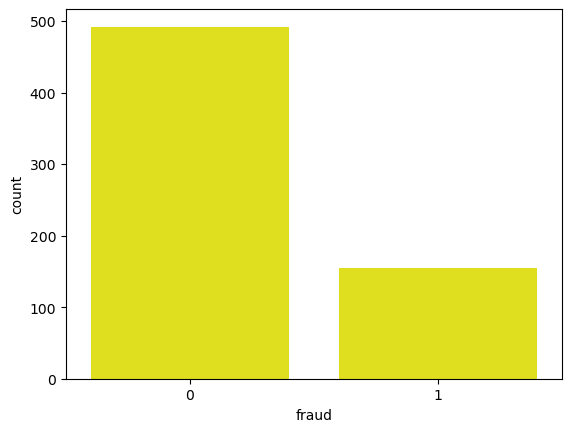

In [59]:
# Visual using seaborn library for data visualization

sns.countplot(data=df,x='fraud', color='yellow') 

Create separate datasets for normal and fraud transactions

In [60]:
df.columns

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud', 'Year', 'Month'],
      dtype='object')

In [ ]:
#Extracting fraudulent transactions only 
fraud=df[df['fraud']==1] #fraud

In [62]:
fraud.head(3)

,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun


In [64]:
df.fraud.value_counts()

fraud
0    492
1    155
Name: count, dtype: int64

In [63]:
fraud.shape

(155, 15)

In [65]:
#Extracting normal transactions
normal=df[df['fraud']==0]

In [66]:
normal.shape

(492, 15)

# Analyzing the fraud dataset 

In [67]:
fraud.head()

,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,Bank Transfer,Other,New Delhi,Himachal Pradesh,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,Subscription,UPI Pay,Bharatpur,Chhattisgarh,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,Investment,Dummy Bank,Sagar,Mizoram,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [68]:
#check data types 

fraud.dtypes

Transaction_Type                 object
Payment_Gateway                  object
Transaction_City                 object
Transaction_State                object
Transaction_Status               object
Device_OS                        object
Transaction_Frequency             int64
Merchant_Category                object
Transaction_Channel              object
Transaction_Amount_Deviation    float64
Days_Since_Last_Transaction       int64
amount                          float64
fraud                             int64
Year                              int32
Month                            object
dtype: object

In [69]:
numeric_columns = fraud.select_dtypes(include=['int64','int32','float'])

In [70]:
cat_columns = fraud.select_dtypes(include='object')

In [71]:
numeric_columns.corr()

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year
Transaction_Frequency,1.000000,0.112079,0.048399,-0.047628,NaN,-0.068477
Transaction_Amount_Deviation,0.112079,1.000000,-0.057579,-0.034097,NaN,-0.005956
Days_Since_Last_Transaction,0.048399,-0.057579,1.000000,0.078918,NaN,-0.003681
amount,-0.047628,-0.034097,0.078918,1.000000,NaN,0.022114
fraud,NaN,NaN,NaN,NaN,NaN,NaN
Year,-0.068477,-0.005956,-0.003681,0.022114,NaN,1.000000


Visualising entire dataset 

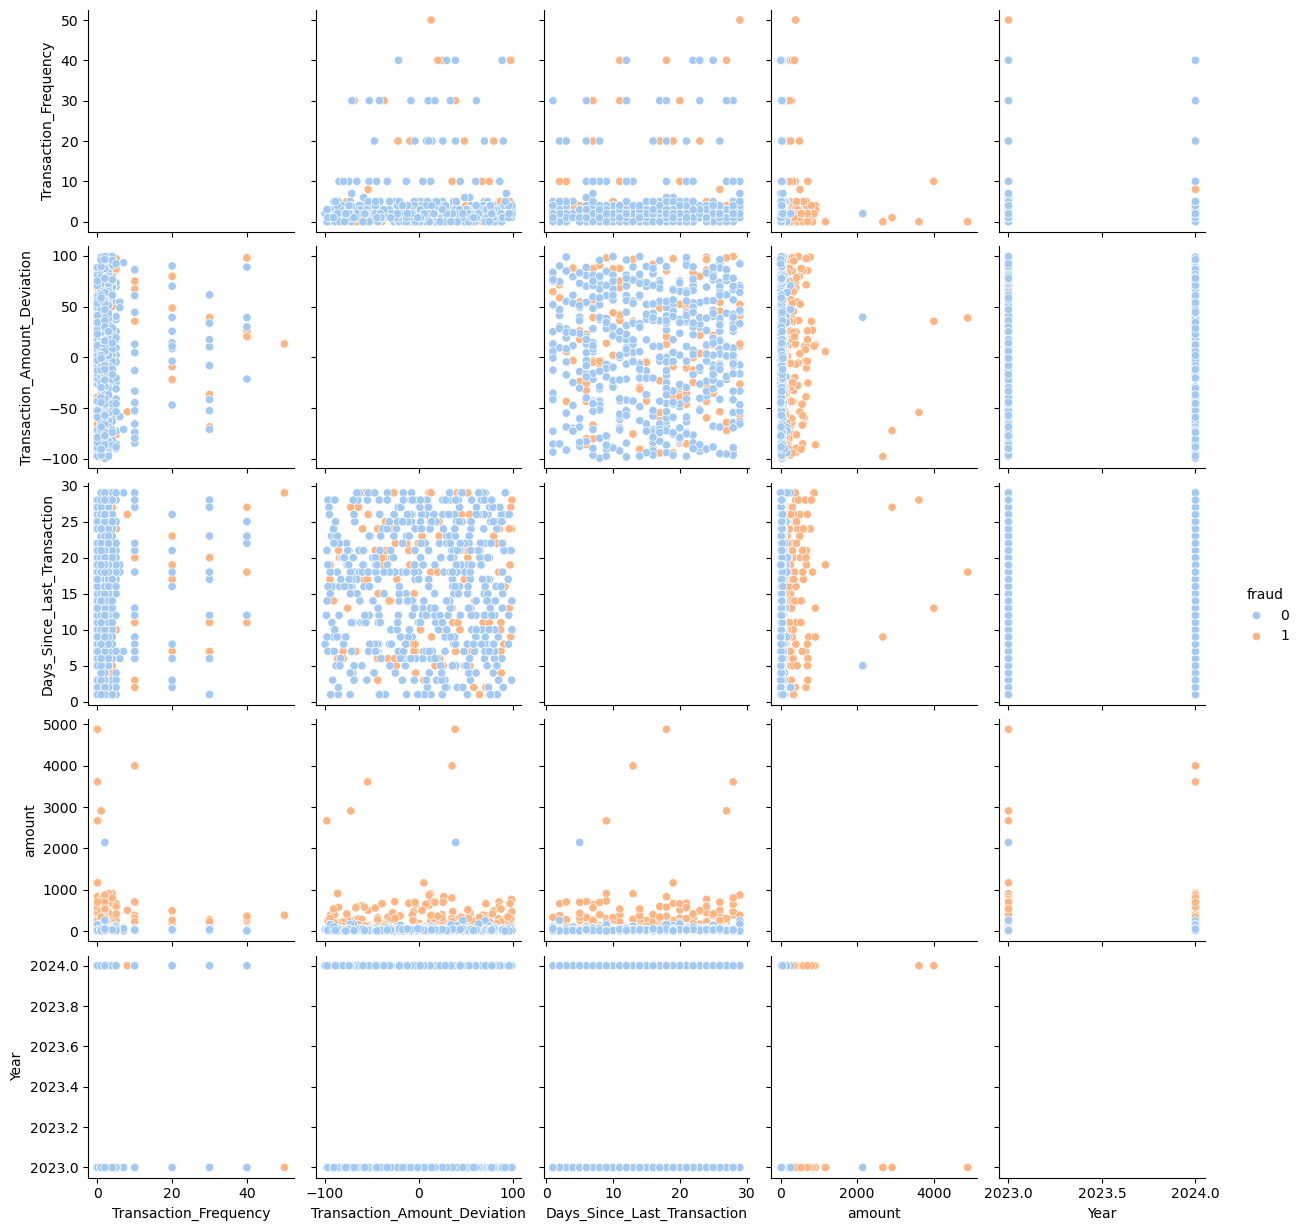

In [72]:
# Visualising the different features basis the fraud occurences as a subplot

sns.pairplot(data=df, hue='fraud', palette='pastel', diag_kind='dist')

- Visualising different features basis the fraud occurences as a subplot 

In [73]:
import plotly.express as px

#plot 1: Fraud distribution by transaction type
fig = px.bar(x=fraud['Transaction_Type'].value_counts().index,
             y= fraud['Transaction_Type'].value_counts().values,
             color=fraud['Transaction_Type'].value_counts().index,
             title = "Fraud distribution by transaction type",
             labels = {'x': 'Transaction type', 'y': 'Fraud markers'},
             color_discrete_sequence= px.colors.qualitative.Pastel)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()             

In [74]:
#plot 2: Fraud distribution by payment gateway
fig = px.bar(x=fraud['Payment_Gateway'].value_counts().index,
             y= fraud['Payment_Gateway'].value_counts().values,
             color=fraud['Payment_Gateway'].value_counts().index,
             title = "Fraud distribution by Payment Gateway",
             labels = {'x': 'Payment Gateway', 'y': 'Fraud markers'},
             color_discrete_sequence= px.colors.qualitative.Pastel)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show() 

In [75]:
#plot 3: Fraud distribution by merchant category
fig = px.bar(x=fraud['Merchant_Category'].value_counts().index,
             y= fraud['Merchant_Category'].value_counts().values,
             color=fraud['Merchant_Category'].value_counts().index,
             title = "Fraud distribution by  Merchant Category",
             labels = {'x': ' Merchant Category', 'y': 'Fraud markers'},
             color_discrete_sequence= px.colors.qualitative.Pastel)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show() 

In [76]:
#plot 4: Distribution of Transaction Amount 
fig = px.histogram(fraud, x='amount', nbins=20,
                   title='Distribution of Transaction Amount',
                   labels={'amount': 'Transaction Amount'} )
fig.show()                   

In [78]:
#plot 5:Relationship between Transaction frequency and Fraud using scatter plot
fig = px.scatter(fraud, x='Transaction_Frequency', y='fraud',
                   title='Relationship between Transaction Frequency and Fraud',
                   labels={'Transaction_Frequency': 'Transaction Frequency', 'fraud': 'Fraud Markers'},
                   color='fraud',color_discrete_map={0: 'lightblue', 1: 'orange'} )

fig.show()

In [79]:
#plot 6:Relationship between Days Since Last Transaction and Fraud using scatter plot
fig = px.scatter(fraud, x='Days_Since_Last_Transaction', y='fraud',
                   title='Relationship between Transaction Frequency and Fraud',
                   labels={'Days_Since_Last_Transaction': 'Days Since Last Transaction', 'fraud': 'Fraud Markers'},
                   color='fraud',color_discrete_map={0: 'lightblue', 1: 'orange'} )

fig.show()

In [80]:
#plot 7: Relationship between Transaction_State and Fraud using bar plot 
fig = px.bar(x=fraud['Transaction_State'].value_counts().index,
             y= fraud['Transaction_State'].value_counts().values,
             color=fraud['Transaction_State'].value_counts().index,
             title = "Fraud distribution by Transaction_state",
             labels = {'x': 'Transaction_State', 'y': 'Fraud markers'},
             color_discrete_sequence= px.colors.qualitative.Pastel)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show() 

In [81]:
#plot 8: Relationship between Device_OS and Fraud using bar plot 
fig = px.bar(x=fraud['Device_OS'].value_counts().index,
             y= fraud['Device_OS'].value_counts().values,
             color=fraud['Device_OS'].value_counts().index,
             title = "Fraud distribution by Device_OS",
             labels = {'x': 'Device_OS', 'y': 'Fraud markers'},
             color_discrete_sequence= px.colors.qualitative.Pastel)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show() 

# Insights from the above visualisations:

- Transaction types: Bank transfer, purchase & bill payment, are highly contributing to fraudulent transactions.

- Platforms like: ICICI, HDFC and GooglePay have reported the highest number of fraudulent transactions.

- Mercant category: home delivery, travel bookings, utlity, have reported the highest number of fraudulent transactions.

- Transaction amount ranging 250 to 750 are highly sensitive to fraudulent transactions.

- Transaction amount ranging 0 to 1250 are highest contributers to fraudulent transactions between FY 23-24.

- Transaction frequency: 0 to 10 is highly sensitive to fraudulent transactions.

- Days since last transaction feature is not contributing to the analysis as no pattern identified, hence can be dropped.

- States-Himachal pradesh, Rajasthan, Meghalaya & Bihar are highly sensitive to fraudulent transactions.

- Android OS reported highest number of fraudulent transactions

Dropping unnecessary columns from entire dataset

In [82]:
df.columns

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud', 'Year', 'Month'],
      dtype='object')

In [83]:
columns_to_drop = ['Days_Since_Last_Transaction','Transaction_Frequency','Transaction_Amount_Deviation',
                    'Transaction_Status','Device_OS','Transaction_Channel','Transaction_City']
df.drop(columns=columns_to_drop, inplace=True)          

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   647 non-null    object 
 1   Payment_Gateway    647 non-null    object 
 2   Transaction_State  647 non-null    object 
 3   Merchant_Category  647 non-null    object 
 4   amount             647 non-null    float64
 5   fraud              647 non-null    int64  
 6   Year               647 non-null    int32  
 7   Month              647 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 38.0+ KB


In [85]:
df.shape

(647, 8)

In [86]:
df.columns

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_State',
       'Merchant_Category', 'amount', 'fraud', 'Year', 'Month'],
      dtype='object')

Encoding and scaling 

In [87]:
data = df.copy()

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_Type   647 non-null    object 
 1   Payment_Gateway    647 non-null    object 
 2   Transaction_State  647 non-null    object 
 3   Merchant_Category  647 non-null    object 
 4   amount             647 non-null    float64
 5   fraud              647 non-null    int64  
 6   Year               647 non-null    int32  
 7   Month              647 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 38.0+ KB


In [89]:
# converting year column to object 
data['Year'] = data['Year'].astype('object')

In [90]:
# Extracting categorical columns from data
categorical_cols = data.select_dtypes(include=['object']).columns

categorical_cols

Index(['Transaction_Type', 'Payment_Gateway', 'Transaction_State',
       'Merchant_Category', 'Year', 'Month'],
      dtype='object')

In [92]:
from sklearn.preprocessing import LabelEncoder

cols = ['Year','Month']

label_encoder = LabelEncoder()
for col in cols:
    data[col] = label_encoder.fit_transform(data[col])

In [95]:
#non ordinal variables
non_ordinal = ['Transaction_Type','Payment_Gateway','Transaction_State','Merchant_Category']

# performing one hot encoding for non_ordinal variables
data = pd.get_dummies(data, columns=non_ordinal,drop_first=True)

#Convert boolean columns to integers 
data = data.astype(int)

In [96]:
data.head()

,amount,fraud,Year,Month,Transaction_Type_Bill Payment,Transaction_Type_Investment,Transaction_Type_Other,Transaction_Type_Purchase,Transaction_Type_Refund,Transaction_Type_Subscription,...,Transaction_State_West Bengal,Merchant_Category_Donations and Devotion,Merchant_Category_Financial services and Taxes,Merchant_Category_Home delivery,Merchant_Category_Investment,Merchant_Category_More Services,Merchant_Category_Other,Merchant_Category_Purchases,Merchant_Category_Travel bookings,Merchant_Category_Utilities
0,396,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,121,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,106,1,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3611,1,1,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,374,1,0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [97]:
data.dtypes

amount                                            int32
fraud                                             int32
Year                                              int32
Month                                             int32
Transaction_Type_Bill Payment                     int32
Transaction_Type_Investment                       int32
Transaction_Type_Other                            int32
Transaction_Type_Purchase                         int32
Transaction_Type_Refund                           int32
Transaction_Type_Subscription                     int32
Payment_Gateway_Bank of Data                      int32
Payment_Gateway_CReditPAY                         int32
Payment_Gateway_Dummy Bank                        int32
Payment_Gateway_Gamma Bank                        int32
Payment_Gateway_Other                             int32
Payment_Gateway_SamplePay                         int32
Payment_Gateway_Sigma Bank                        int32
Payment_Gateway_UPI Pay                         

In [98]:
data.shape

(647, 54)

To improve the computational effeciency , taking 50% of the entire data for model building and testing keeping the ration intact 


In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split

#split the data into 'fraud' and 'non-fraud' classes
fraud_data  = data[data['fraud']==1]
non_fraud_data = data[data['fraud']==0]

#sample each class separately while maintaining proportions 
sampled_fraud_data = fraud_data.sample(frac=0.5, random_state=42)
sampled_non_fraud_data = non_fraud_data.sample(frac=0.5, random_state=42)

#Combine the sampled data back together 
data= pd.concat([sampled_fraud_data, sampled_non_fraud_data])


Model Building 

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Perform Scaling 
def preprocess_data(X):

    #Initializes StandardScalar
    scaler = StandardScaler()

    #Scale the features 
    X_scaled = scaler.fit_transform(X)
    return X_scaled 

#Splitting the dataset into features (X) and target variables (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

#Preprocess the features 
X_scaled = preprocess_data(X)

#Split the preprocessed data into the training set and Test set
X_train, X_test, y_train ,y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Print the shapes of the training and test sets 
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Training features shape: (259, 53)
Test features shape: (65, 53)
Training target shape: (259,)
Test target shape: (65,)


Model performance before data balancing .i.e, with RAW data

In [106]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 4.8 MB/s eta 0:00:32
   ---------------------------------------- 1.6/150.0 MB 4.4 MB/s eta 0:00:34
    --------------------------------------- 2.6/150.0 MB 4.7 MB/s eta 0:00:32
   - -------------------------------------- 3.9/150.0 MB 5.1 MB/s eta 0:00:29
   - -------------------------------------- 5.5/150.0 MB 5.6 MB/s eta 0:00:26
   - -------------------------------------- 6.6/150.0 MB 5.6 MB/s eta 0:00:26
   - -------------------------------------- 7.3/150.0 MB 5.4 MB/s eta 0:00:27
   - -------------------------------------- 7.3/150.0 MB 5.4 MB/s eta 0:00:27
   - -------------------------------------- 7.3/150.0 MB 5.4 MB/s eta 0:00:27
   -- ------------------------------------- 7.6/150.0 MB 3.7 MB/s eta 0:00:39
   -- ------------------------------------- 8.4/150.0 MB 3.7 MB/s eta 0

In [110]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier #Import XGBoost classifier

#Split the sampled data into training and testing sets with a test size of 30%
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Define a function to evaluate a model and return a dictionary of metrics 
def evaluate_model(model, X_test,y_test):
    #calculate predictions
    y_pred = model.predict(X_test)

    #compute metrics 
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)

    #Return metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

#Define models without Support Vector Machine (SVM)
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(), #added xgboost to the dictionary
}

#List to store evaluation results
results = []

#Model training and evaluation 
for model_name,model in models.items():
    print(model_name + ":")
    model.fit(X_train,y_train)
    metrics = evaluate_model(model,X_test, y_test)
    results.append(metrics)

#create a DataFrame from the results 
df_results = pd.DataFrame(results)

#Define the Dataframe
df_results



Decision Tree:
Random forest:
Gradient Boosting:
XGBoost:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,DecisionTreeClassifier,0.907692,0.812500,0.8125,0.812500,0.875638
1,RandomForestClassifier,0.953846,1.000000,0.8125,0.896552,0.906250
2,GradientBoostingClassifier,0.938462,0.928571,0.8125,0.866667,0.896046
3,XGBClassifier,0.953846,0.933333,0.8750,0.903226,0.927296


# Inferences 
Inferences

- Accuracy: All models achieved high accuracy, ranging from 98.84% to 99.24%, indicating their proficiency in classifying transactions. However, accuracy alone might not provide a complete picture, especially in cases of imbalanced datasets like fraud detection.

- Precision and Recall: Precision measures the percentage of predicted positive instances among all actual positive instances, while recall measures the percentage of correctly predicted positive instances among all actual positive instances .

- F1 Score: The F1 score, the harmonic mean of precision and recall, offers a balanced assessment of the model's performance. It is particularly useful in scenarios with class imbalance, such
as fraud detection.

- ROC AUC Score: The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score evaluates the model's ability to discriminate between classes. Higher ROC AUC scores Indicate better performance.

- Model Performance: While all models demonstrated strong performance, the Random Forest Classifier and XGBoost Classifier stood out. The Random Forest Classifier achieved an Ft score of 73.13% with an accuracy of 99.28%, indicating its ability to balance precision and recall effectively. On the other hand, the XGBoost Classifier surpassed all others with an F1 score of
64.29%, highlighting its robust performance.

- Decision Tree and Gradient Boosting: Although the Decision Tree Classifier and Gradient Boosting Classifier exhibited competitive performance, they slightly lagged behind the Random Forest and XGBoost classifiers in terms of F1 score.

- Overall Recommendation Considering the F1 score and overall performance, the Random Forest Classifier emerges as the top choice for fraud detection in this scenario. However, the XGBoost Classifier also offers a strong alternative, particularly when computational efficiency is a concem. Both models provide effective solutions for identifying fraudulent transactions, with the Random Forest Classifier leading with the highest F1 score.

### Oversampling (SMOTE)

In [111]:
X = data.drop('fraud',axis=1)
y = data['fraud']

In [112]:
X.shape

(324, 53)

In [113]:
y.shape

(324,)

In [114]:
from imblearn.over_sampling import SMOTE

#using SMOTE to oversample the minority class
X_res,y_res = SMOTE().fit_resample(X, y)

#Print the count of each class after oversampling
print(y_res.value_counts())

fraud
1    246
0    246
Name: count, dtype: int64


In [115]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier #Import XGBoost classifier

#Split the sampled data into training and testing sets with a test size of 30%
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Define a function to evaluate a model and return a dictionary of metrics 
def evaluate_model(model, X_test,y_test):
    #calculate predictions
    y_pred = model.predict(X_test)

    #compute metrics 
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc_auc = roc_auc_score(y_test,y_pred)

    #Return metrics as a dictionary
    return {
        'Model': type(model).__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc
    }

#Define models without Support Vector Machine (SVM)
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(), #added xgboost to the dictionary
}

#List to store evaluation results
results = []

#Model training and evaluation 
for model_name,model in models.items():
    print(model_name + ":")
    model.fit(X_train,y_train)
    metrics = evaluate_model(model,X_test, y_test)
    results.append(metrics)

#create a DataFrame from the results 
df_results = pd.DataFrame(results)

#Define the Dataframe
df_results



Decision Tree:
Random forest:
Gradient Boosting:
XGBoost:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,DecisionTreeClassifier,0.892308,0.800000,0.7500,0.774194,0.844388
1,RandomForestClassifier,0.969231,1.000000,0.8750,0.933333,0.937500
2,GradientBoostingClassifier,0.938462,0.928571,0.8125,0.866667,0.896046
3,XGBClassifier,0.953846,0.933333,0.8750,0.903226,0.927296


### Inference:

- RandomForestclassifier has the highest F1 Score : 93% across all metrics. Hence, it is the best model out of the four models tested for UPI fraud detection.

In [123]:
import plotly.express as px

# Sort the DataFrame by F1 Score
df_results_sorted = df_results.sort_values(by='F1 Score', ascending=False)

# Create a bar chart without text inside bars
fig = px.bar(
    df_results_sorted,
    x='Model',
    y='F1 Score',
    color='Model',
    title='F1 Score of Models'
)

# Update layout
fig.update_layout(
    xaxis_title='Model',
    yaxis_title='F1 Score',
    xaxis={'categoryorder': 'total descending'},
    margin=dict(l=20, r=20, t=50, b=20)
)

fig.show()
